In [3]:
from __init__ import *
from rain import *
from common import *
from event import *

In [43]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

In [5]:
path = './input/'
rg = Rain(path=path, name='StLouis_MSD_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rad = Rain(path=path, name='StLouis_MSD_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rg.ll_file = 'StLouis_MSD_lat_lon_{YEAR}.csv'.format(YEAR=rg.year)
rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()

In [6]:
p.save_path = './output/StLouis/'

In [7]:
%load_ext autoreload

In [8]:
%aimport common
%aimport rain
%aimport event

In [127]:
%autoreload

In [10]:
p.get_rainiest(1)

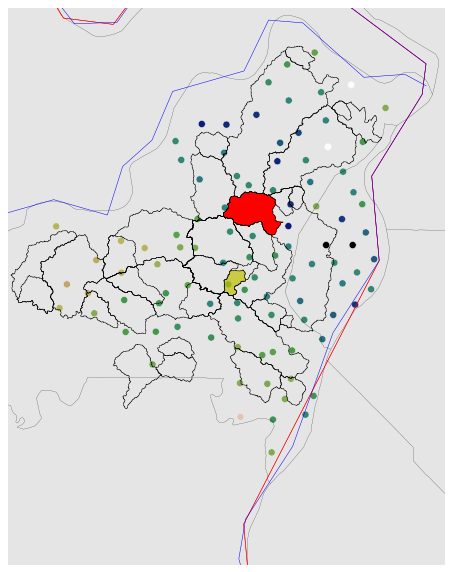

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
map = Basemap(llcrnrlon=-90.7,llcrnrlat=38.3,urcrnrlon=-90.1,urcrnrlat=38.9,
             resolution='i', projection='tmerc', lat_0 =38.6, lon_0 = -90.4, ax=ax)

map.drawcounties()
map.drawstates(color='r')
map.drawrivers(color='b')

map.readshapefile('/home/jsignell/GitHub/rain-gage-tools/input/StLouis_Watersheds', 'watersheds')
map.scatter(p.rainiest.lon.values, p.rainiest.lat.values, latlon=True, 
            marker='o', s=50, c=p.rainiest[[5]].values, cmap='gist_earth_r')
w_names = []
for shape_dict in map.watersheds_info:
    w_names.append(shape_dict['GAGE_ID'])

seg = map.watersheds[w_names.index('07010022')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

seg = map.watersheds[w_names.index('07010070')]
poly = Polygon(seg, facecolor='y',edgecolor='y', alpha=.7)
ax.add_patch(poly)

plt.show()

[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]



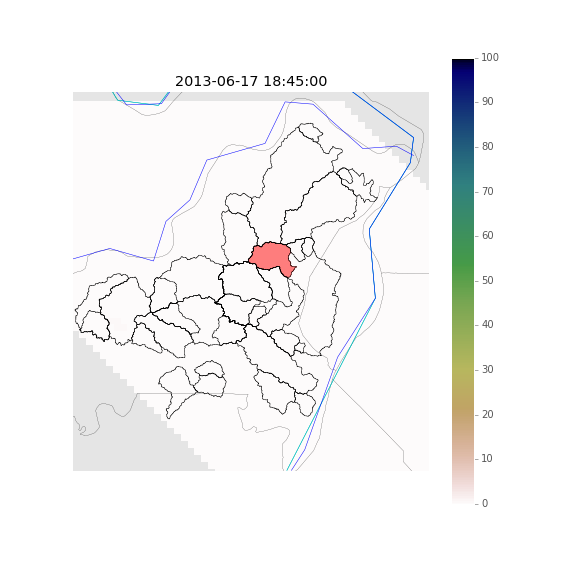
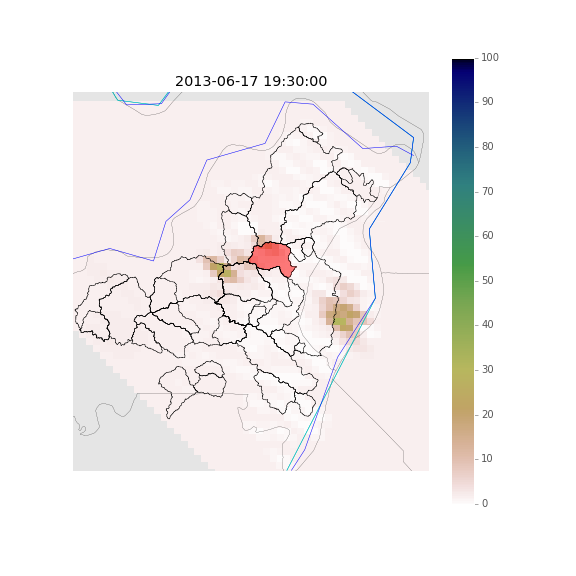
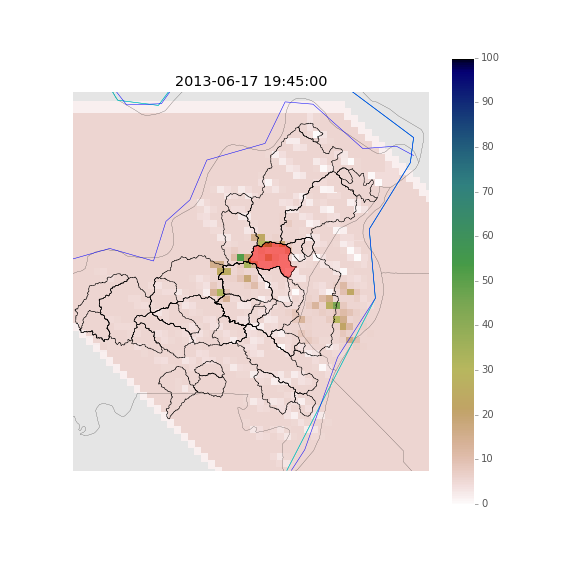
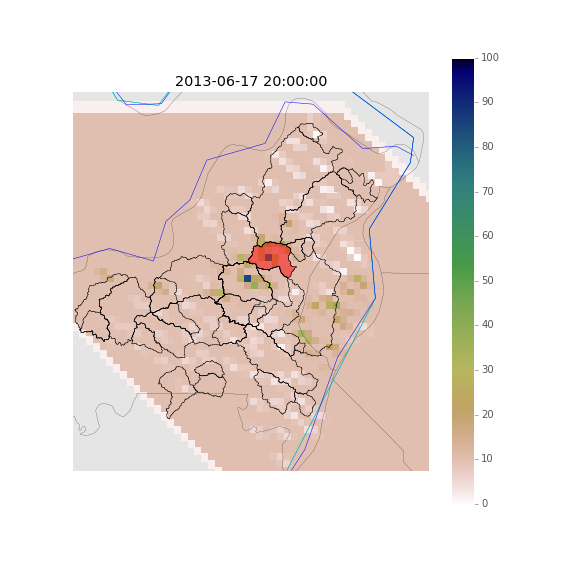
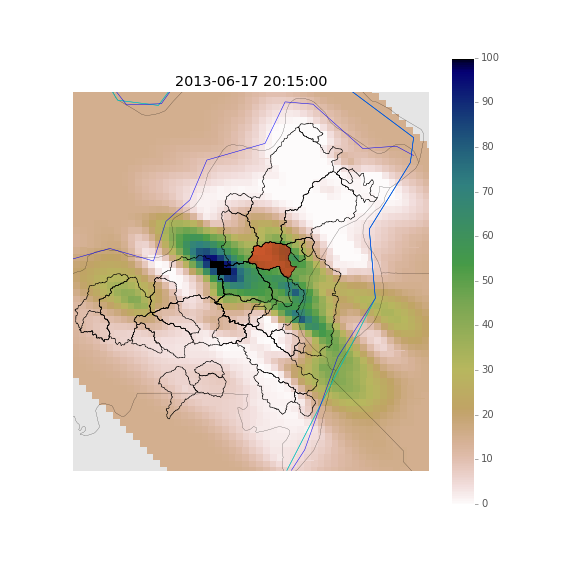
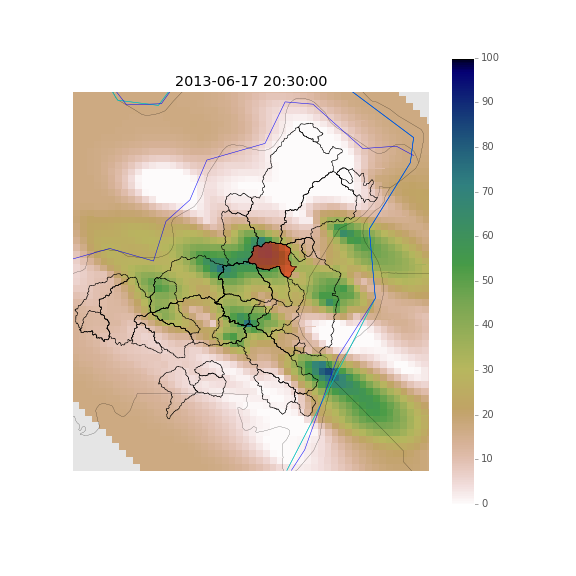
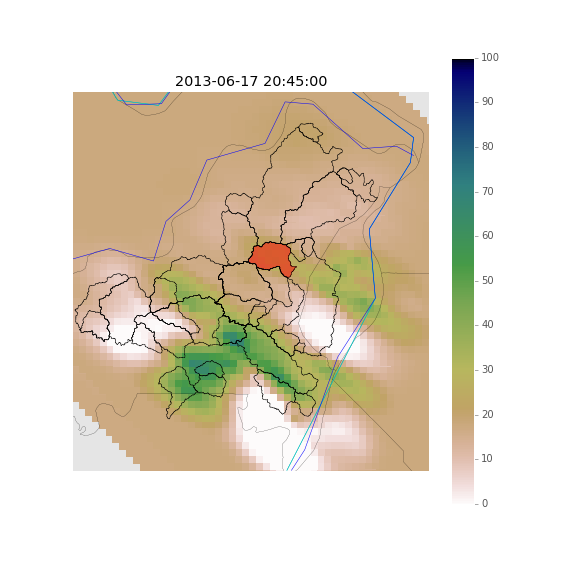
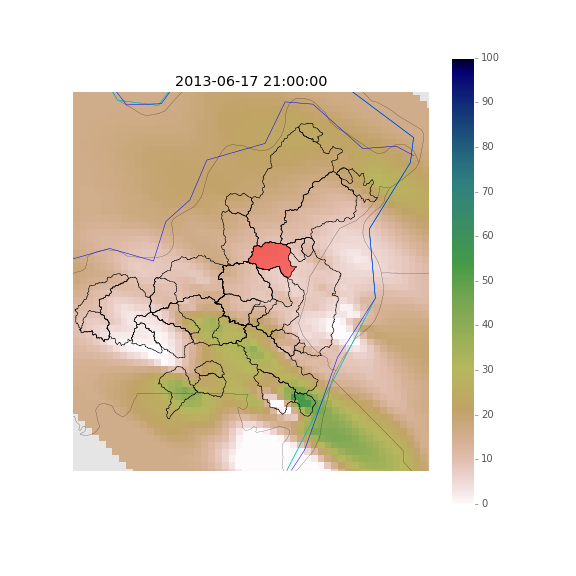
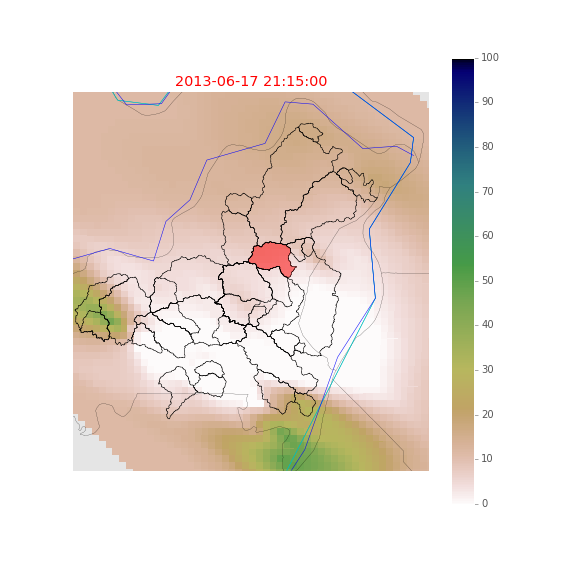
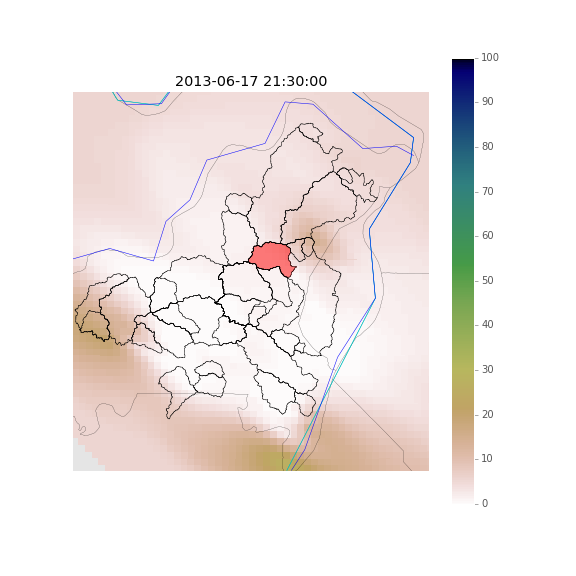
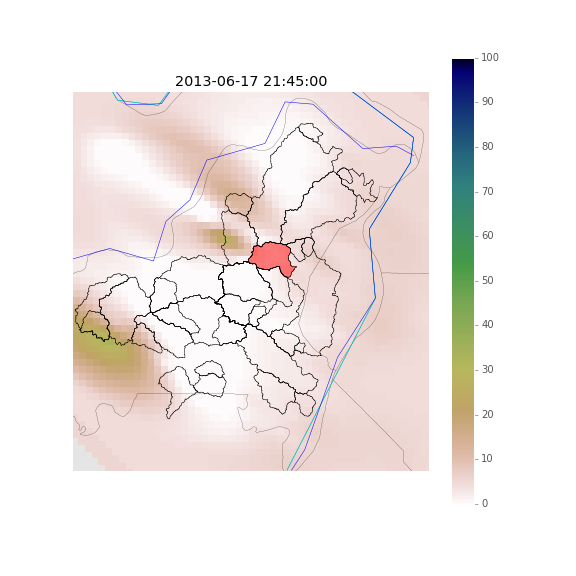
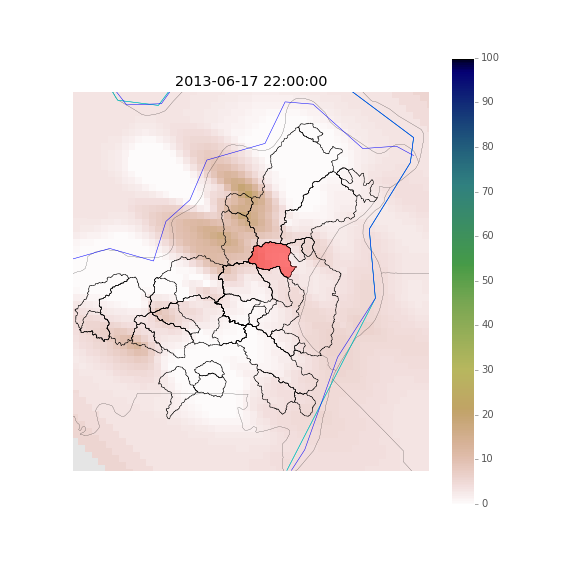
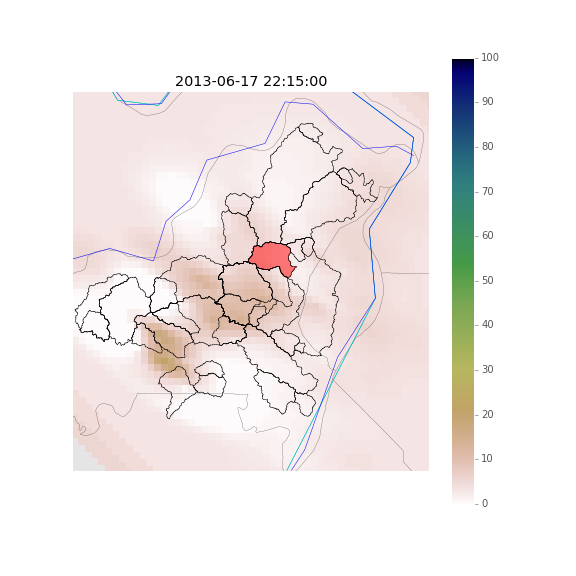
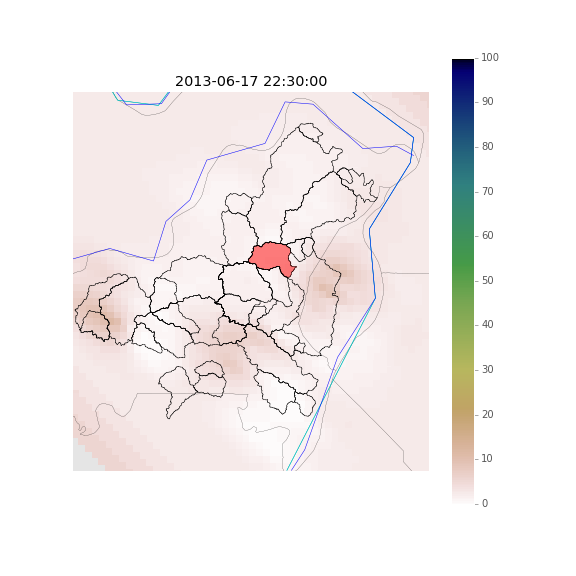
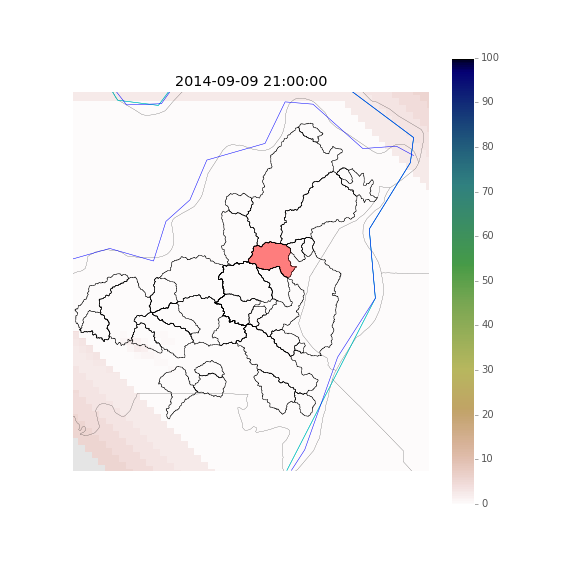
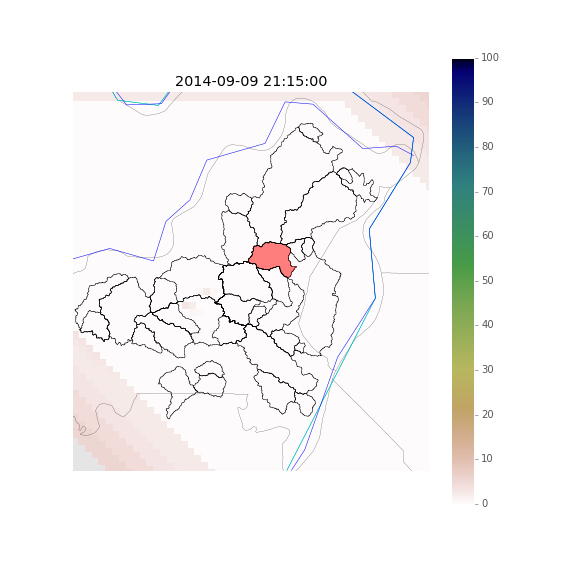
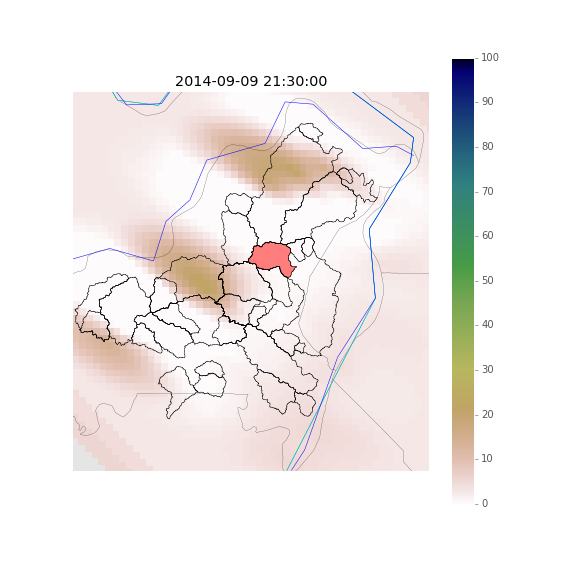
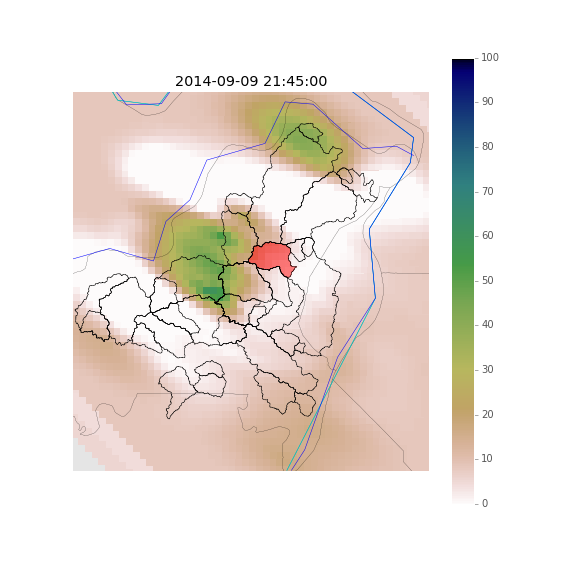
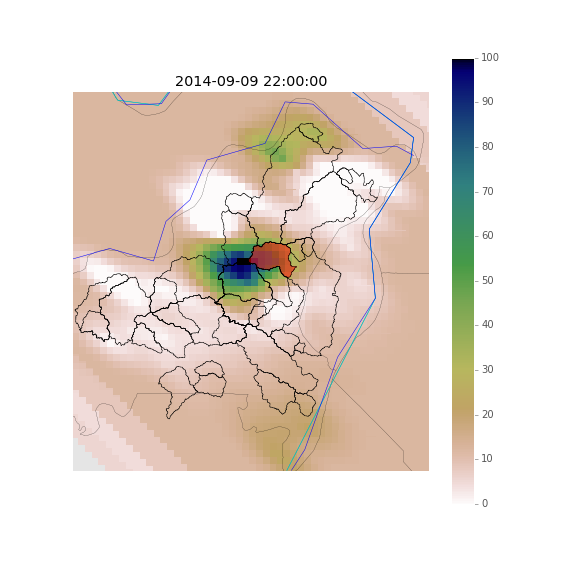
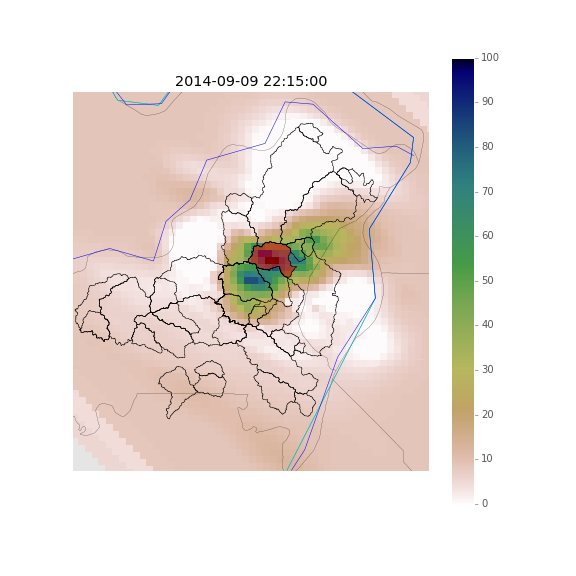
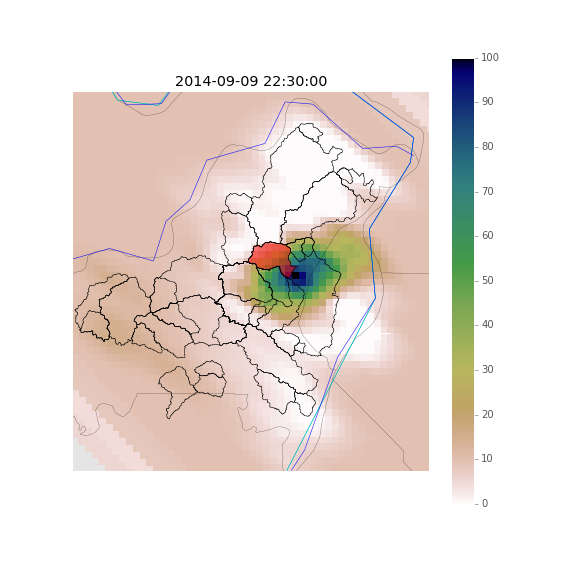
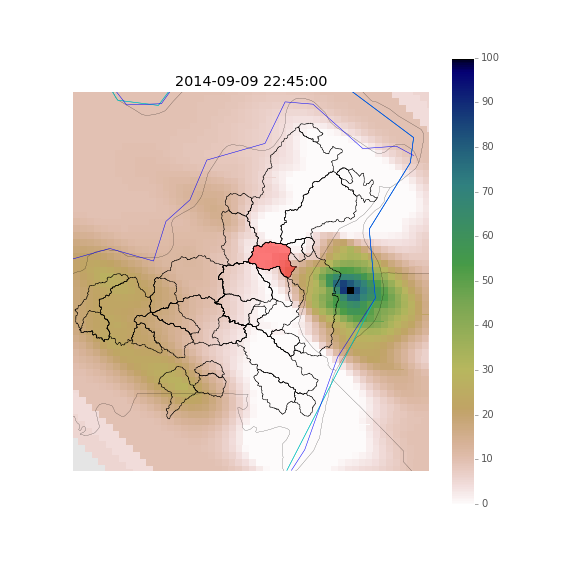
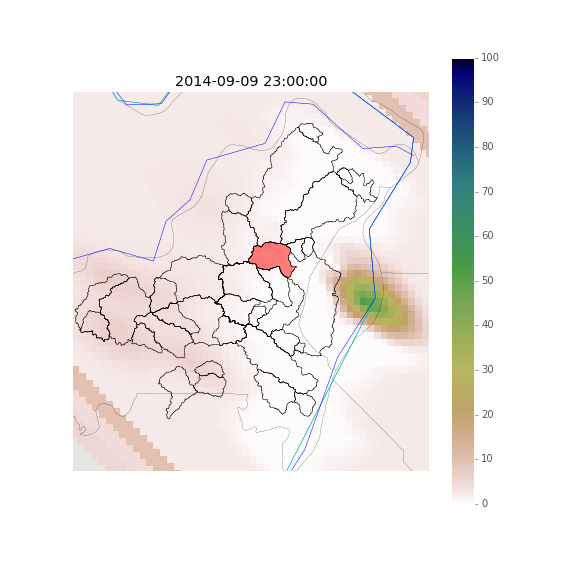
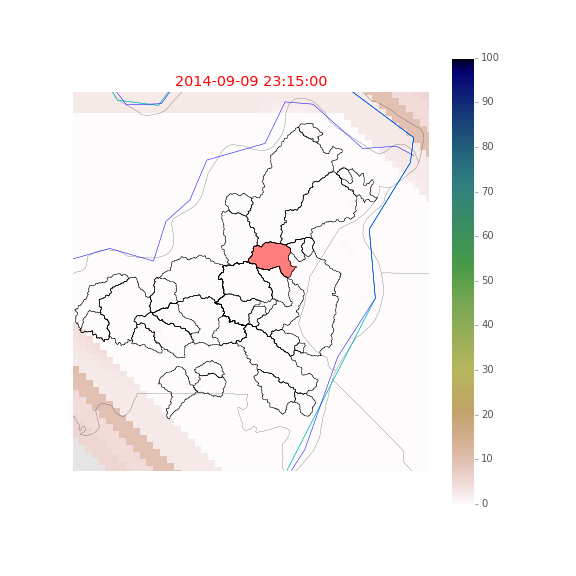
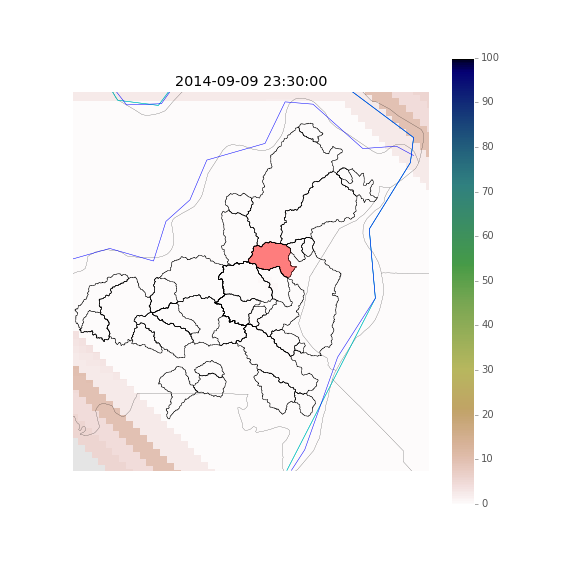
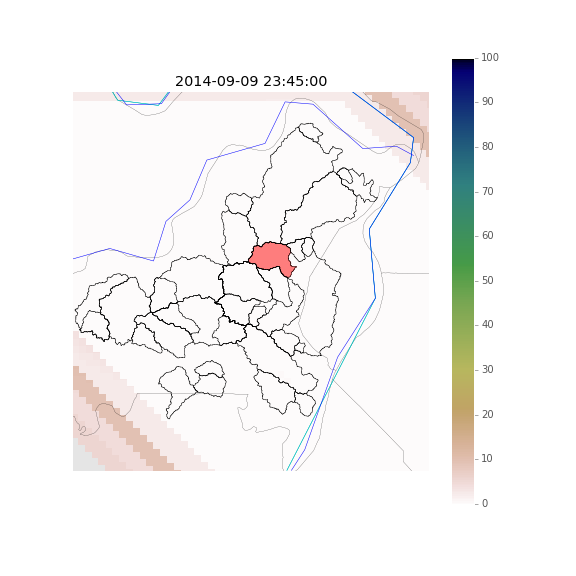
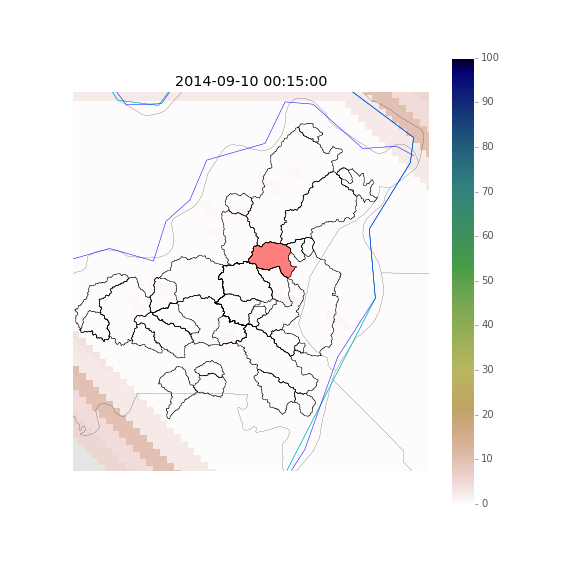

In [135]:
shpfile = '/home/jsignell/GitHub/rain-gage-tools/input/StLouis_Watersheds'
map_krige_movie(z, shpfile, POT_times=[pd.Timestamp('2014-09-09 23:15'), pd.Timestamp('2013-06-17 21:15')],
                llcrnrlon=-90.7,llcrnrlat=38.4,urcrnrlon=-90.1,urcrnrlat=38.9,
                resolution='i', projection='tmerc', lat_0 =38.6, lon_0 = -90.4)

In [133]:
def map_krige_movie(e, shpfile, POT_times=[], res=True, cmap='gist_earth_r', vmin=0, vmax=100, latlon=True, **basemap_kwargs):
    fig, ax = plt.subplots(figsize=(8,8))
    map = Basemap(ax=ax, **basemap_kwargs)

    map.drawcounties()
    map.drawstates(color='c')
    map.drawrivers(color='b')

    map.readshapefile(shpfile, 'watersheds')
    if res:
        sc = map.scatter(z.res.lon.values, z.res.lat.values, c=z.res[[6]].values, latlon=True,
                         cmap=cmap, edgecolors='1', vmin=vmin, vmax=vmax)
    else:
        sc = map.scatter(z.df.lon.values, z.df.lat.values, c=z.df[[6]].values, latlon=True,
                         cmap=cmap, edgecolors='1', vmin=vmin, vmax=vmax)
    fig.colorbar(sc)

    w_names = []
    for shape_dict in map.watersheds_info:
        w_names.append(shape_dict['GAGE_ID'])

    # get Texas and draw the filled polygon
    seg = map.watersheds[w_names.index('07010022')]
    poly = Polygon(seg, facecolor='red',edgecolor='red', alpha=.5)
    ax.add_patch(poly)
    
    def animate(col):
        k = z.krige(i=z.res.columns.get_loc(col), res=True, animated=False, plot_k=False, latlon=True)
        if col in POT_times:
            ax.set_title(col, color='r')
        else:
            ax.set_title(col, color='k')
        map.scatter(k.lon.values, k.lat.values, c=k['var1.pred'].values, latlon=True,
                    cmap='gist_earth_r', marker='s', edgecolors='none', s=300, ax=ax, vmin=0, vmax=100)
    
    frames = [col for col in z.data_cols if col in z.res.columns]
    return animation.FuncAnimation(fig, animate, frames=frames, interval=300, blit=True)

In [125]:
df = pd.read_csv(path+'The flashiest watersheds in St. Louis_1122.txt', header=None,
                 nrows=20, skiprows=[0,7,14,21], delim_whitespace=True,parse_dates=True)
a=[]
for i in range(len(df)):
    a.append(pd.datetime(df.loc[i,0], df.loc[i,1], df.loc[i,2], df.loc[i,3], df.loc[i,4]))

tt = [t for t in a if rg.rate.index[0] < t < rg.rate.index[-1]]

z = rg.ll
for t in tt[0:2]:
    z = z.join(rg.rate.loc[t-pd.DateOffset(hours=3):t+pd.DateOffset(hours=1)].transpose())
z = Event(z)
z.detrend(latlon=True)

In [131]:
ax.set_title('cat', color='r')

In [90]:
tt

[datetime.datetime(2013, 6, 17, 21, 30),
 datetime.datetime(2014, 9, 9, 23, 20),
 datetime.datetime(2010, 5, 12, 9, 23)]

[using ordinary kriging]


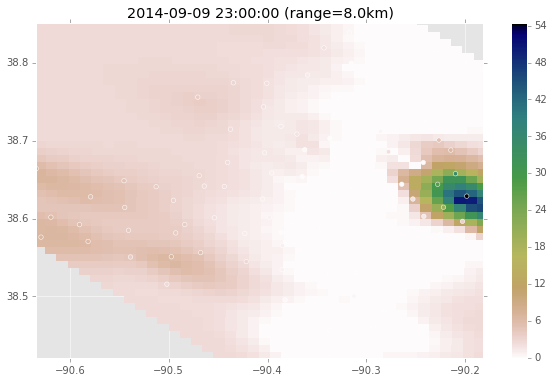

In [75]:
i = z.res.columns.get_loc(pd.Timestamp('2014-09-09 23:00'))
k = z.krige(i=i, res=True, animated=False, latlon=True)

In [118]:
[z.res.columns.get_loc(z.data_cols[i]) for i in range(len(z.data_cols))]

KeyError: Timestamp('2013-06-17 18:30:00')

In [119]:
[i for i in z.data_cols if i in z.res.columns]

[Timestamp('2013-06-17 18:45:00'),
 Timestamp('2013-06-17 19:30:00'),
 Timestamp('2013-06-17 19:45:00'),
 Timestamp('2013-06-17 20:00:00'),
 Timestamp('2013-06-17 20:15:00'),
 Timestamp('2013-06-17 20:30:00'),
 Timestamp('2013-06-17 20:45:00'),
 Timestamp('2013-06-17 21:00:00'),
 Timestamp('2013-06-17 21:15:00'),
 Timestamp('2013-06-17 21:30:00'),
 Timestamp('2013-06-17 21:45:00'),
 Timestamp('2013-06-17 22:00:00'),
 Timestamp('2013-06-17 22:15:00'),
 Timestamp('2013-06-17 22:30:00')]